In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**importing packages**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Reading the dataset**

In [ ]:
df= pd.read_csv('mammoreport.csv',encoding= 'unicode_escape')
df.head()

,Features,Birads
0,Soft tissue mass lesion (23 x 20 mm) with spic...,4
1,Parenchyma is predominantly FATTY.No distinctl...,1
2,Parenchyma is predominantly GLANDULAR. No dist...,1
3,Parenchyma is predominantly GLANDULAR. No dist...,2
4,Parenchyma is GLANDULAR and FATTY. Small subce...,2


In [ ]:
df['Birads'] = df['Birads'].map( {0:0 ,1:0, 2:0, 3:0, 4:0, 5:1,6:1}).astype(int)

In [ ]:
df.head()

,Features,Birads
0,Soft tissue mass lesion (23 x 20 mm) with spic...,0
1,Parenchyma is predominantly FATTY.No distinctl...,0
2,Parenchyma is predominantly GLANDULAR. No dist...,0
3,Parenchyma is predominantly GLANDULAR. No dist...,0
4,Parenchyma is GLANDULAR and FATTY. Small subce...,0


In [ ]:
df.columns

Index(['Features', 'Birads'], dtype='object')

In [ ]:
#printing no.of rows in each column
l1=len(df['Features'])
print("type-column:",l1)
l2=len(df['Birads'])
print("text-column :",l2)

type-column: 107
text-column : 107


#**Tokenization**

In [ ]:
#before tokenization
df['Features'][5]

'Parenchyma is predominantly GLANDULAR. A small well defined radiopaque shadow seen in the superior and outer quadrant of the right breast. No spiculated margins / parenchymal calcifications. Vascular pattern appears normal. Pectoralis and retromammary space appear normal. Nipple-areolar outline, skin & subcutaneous fat plane are normal. No skin thickening or irregularity. No enlargement of axillary lymphnodes seen. A small well defined radiopaque shadow seen in the superior and outer quadrant of the right breast. No spiculated margins / parenchymal calcifications. No axillary lymphadenopathy on either side.'

In [ ]:
#Removal of words
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

df.loc[:,"Features"] = df.Features.apply(lambda x: remove_stopWords(x))

In [ ]:
#Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
df.loc[:,"Features"] = df.Features.apply(lambda x: stemSentence(x))

In [ ]:
df

,Features,Birads
0,soft tissu mass lesion ( 23 x 20 mm ) spicul m...,0
1,parenchyma predominantli fatty.no distinctli i...,0
2,parenchyma predominantli glandular . No distin...,0
3,parenchyma predominantli glandular . No distin...,0
4,parenchyma glandular fatti . small subcentimet...,0
...,...,...
102,parenchyma predominantli fatti . few tini beni...,0
103,parenchyma predominantli fatti . few tini beni...,0
104,parenchyma predominantli glandular . fibroaden...,0
105,parenchyma predominantli glandular . A well de...,1


In [ ]:
#Removal of punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Features"] = df["Features"].apply(lambda text: remove_punctuation(text))
df.head()

,Features,Birads
0,soft tissu mass lesion 23 x 20 mm spicul mar...,0
1,parenchyma predominantli fattyno distinctli id...,0
2,parenchyma predominantli glandular No distinc...,0
3,parenchyma predominantli glandular No distinc...,0
4,parenchyma glandular fatti small subcentimet ...,0


In [ ]:
df

,Features,Birads
0,soft tissu mass lesion 23 x 20 mm spicul mar...,0
1,parenchyma predominantli fattyno distinctli id...,0
2,parenchyma predominantli glandular No distinc...,0
3,parenchyma predominantli glandular No distinc...,0
4,parenchyma glandular fatti small subcentimet ...,0
...,...,...
102,parenchyma predominantli fatti few tini benig...,0
103,parenchyma predominantli fatti few tini benig...,0
104,parenchyma predominantli glandular fibroadeno...,0
105,parenchyma predominantli glandular A well def...,1


In [ ]:
#Frequent words
from collections import Counter
cnt = Counter()
for text in df["Features"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('No', 330),
 ('normal', 235),
 ('appear', 215),
 ('seen', 207),
 ('skin', 200),
 ('axillari', 177),
 ('breast', 110),
 ('subcutan', 103),
 ('fat', 102),
 ('thicken', 102),
 ('pattern', 100),
 ('retromammari', 100),
 ('space', 100),
 ('plane', 100),
 ('parenchyma', 99),
 ('outlin', 98),
 ('mass', 95),
 ('radio', 83),
 ('opaqu', 83),
 ('lymphnod', 82)]

In [ ]:
class0 = df[df.Birads == 0]
class1 = df[df.Birads == 1]

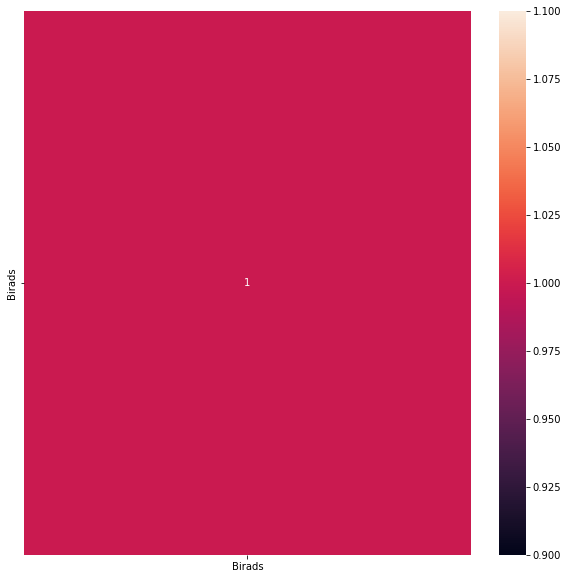

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
for i in range(l2):
  if df.Birads[i] == 0:
    class0 = df.Features[i]
  if df.Birads[i] == 1:
    class1 = df.Features[i]

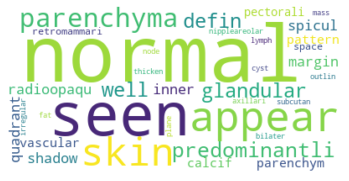

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(class0)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

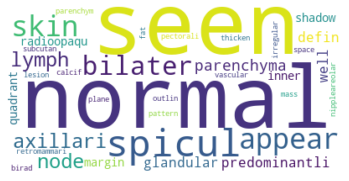

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(class1)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**VECTORIZATION**

In [ ]:
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
vectorizer.fit(df['Features'])
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
# Encode the Document
vector = vectorizer.transform(df['Features'])
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'soft': 301, 'tissu': 321, 'mass': 194, 'lesion': 167, '23': 21, '20': 19, 'mm': 206, 'spicul': 307, 'margin': 187, 'note': 227, 'subareolar': 309, 'region': 264, '3â': 35, 'clock': 84, 'posit': 252, 'mild': 204, 'nippl': 213, 'retract': 267, 'parenchyma': 241, 'predominantli': 255, 'fattyno': 119, 'distinctli': 102, 'identifi': 140, 'radio': 261, 'opaqu': 232, 'no': 215, 'parenchym': 240, 'calcificationvascular': 79, 'pattern': 245, 'appear': 54, 'normalpectorali': 226, 'retromammari': 268, 'space': 304, 'normalnippleareolar': 223, 'outlin': 236, 'skin': 299, 'subcutan': 311, 'fat': 116, 'plane': 248, 'normalno': 224, 'thicken': 318, 'irregularityleft': 157, 'axillari': 59, 'lymphnod': 182, 'seennorm': 281, 'cystleft': 93, 'lymphadenopathi': 175, 'preserv': 256, 'fatti': 117, 'hilum': 136, 'glandular': 133, 'calcif': 72, 'vascular': 327, 'normal': 222, 'pectorali': 246, 'nippleareolar': 214, 'irregular': 155, 'enlarg': 113, 'seen': 272, 'bilater': 62, 'ductal': 108, 'dil

In [ ]:
x = vector.toarray()
y = df['Birads'].values
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
loo.get_n_splits(x)
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(len(x_train[0]))

335


#**Model 1-Logistic Regression**

In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    w = np.random.random(335)
    epoch = 0
    eta = 0.001

    while (epoch<=25):
      epoch = epoch + 1
      w_old = w 
      for xi,yi in zip(x_train,y_train):
        prod = np.dot(xi,w.T)
        sigma = 1/(1+np.exp(-prod))
        if sigma >= 0.5:
          y_hat = 1
        else:
          y_hat = 0
        if y_hat == yi:
          continue
        else:
          w = w_old + eta*(yi - sigma)*xi
      
      
      if np.array_equal(w,w_old):
        break
    
    prod = np.dot(x_test,w.T)
    sigma = 1/(1+np.exp(-prod))
    sigma[sigma<0.5] = 0
    sigma[sigma>=0.5] = 1
    accuracies.append(accuracy_score(y_test,sigma))
print("Accuracy of Logistic Regression: ",np.mean(accuracies))

Accuracy of Logistic Regression:  0.08411214953271028


#**MODEL-2 -PERCEPTRON**

In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    w = np.random.random(335)
    epoch = 0
    eta = 0.00001

    while (epoch<=25):
      epoch = epoch+1
      w_old = w
      for xi,yi in zip(x_train,y_train):
        net = np.dot(w.T,xi)
        if net >= 0:
          y_hat = 1
        else:
          y_hat = 0
        if y_hat == yi:
          continue
        if (yi == 0) and (y_hat == 1):
          w = w - eta*xi
        else:
          w = w + eta*xi
     

      if np.array_equal(w,w_old):
        break
      
      y_hat = np.dot(x_test,w.T)
      y_hat[y_hat<0] = 0
      y_hat[y_hat>=0] = 1
      accuracies.append(accuracy_score(y_test,y_hat))
print("Accuracy of Perceptron: ",np.mean(accuracies))

Accuracy of Perceptron:  0.08411214953271028


#**MODEL 3-SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm = SVC(kernel = 'linear',max_iter=1000,gamma='auto')
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

Accuracy:  0.9345794392523364


In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      svm = SVC(kernel = 'poly',max_iter=1000,gamma='auto')
      svm.fit(x_train, y_train)
      y_pred = svm.predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

Accuracy:  0.9158878504672897


In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      svm = SVC(kernel = 'rbf',max_iter=1000,gamma='auto')
      svm.fit(x_train, y_train)
      y_pred = svm.predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

Accuracy:  0.9158878504672897


In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      svm = SVC(kernel = 'sigmoid',max_iter=1000,gamma='auto')
      svm.fit(x_train, y_train)
      y_pred = svm.predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))


Accuracy:  0.9158878504672897


#**MODEL-4 KNN**

In [ ]:
def KNN(K,pointtobepredicted,X_train,y_train):
  dist_list=[]
  for i in range(len(X_train)):
    xi=list(X_train[i])
    dist=0
    for j in range(len(pointtobepredicted)):
      dist+=(xi[j]-pointtobepredicted[j])**2
    dist=np.sqrt(dist)
    dist_list.append(dist)
  list1=np.argsort(dist_list)
  vote_0=0
  vote_1=1
  for i in range(K):

    if y_train[list1[i]]==1:
      vote_1+=1
    else:
      vote_0+=1
  if vote_0>vote_1:
    return 0
  else:
    return 1

In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("train",train_index)
    print("test",test_index)
    for i in range(0,len(x_test)):
      y_hat=[]
      y_hat.append(KNN(3,x_test[i],x_train,y_train))
      accuracies.append(accuracy_score(y_test,y_hat))
print("accuracies of KNN:",np.mean(accuracies))      


train [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
test [0]
train [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
test [1]
train [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25 

#**MODEL-5 NAIVE BAYES**

In [ ]:
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      from sklearn.naive_bayes import BernoulliNB
      gnb = BernoulliNB()
      y_pred = gnb.fit(x_train,y_train).predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy Naive Bayes: ",np.mean(accuracies))

Accuracy Naive Bayes:  0.9719626168224299


In [ ]:
from sklearn import metrics

In [ ]:
class BernoulliNB:
  def fit(self,X_train,y_train):
    vectorizer = CountVectorizer()
    X_count = vectorizer.fit_transform(X_train).toarray()
    no_of_class = len(np.unique(y_train))
    prior = np.zeros((no_of_class))
    counts = np.zeros(no_of_class)
    for i in range(no_of_class):
      prior[i] = np.sum(y_train==i)/len(y_train)
      counts[i] = np.sum(y_train==i)
    ccm = []
    for i in range(no_of_class):
      probs = np.sum(X_count[y_train==i],axis=0)
      ccm.append(probs)
    return ccm,no_of_class,vectorizer,prior,counts

  def predict(self,X_test,ccm,no_of_class,vectorizer,prior,counts):
    y_pred = np.zeros(len(X_test))
    X_labels = vectorizer.get_feature_names()
    for i in range(len(X_test)):
      xi = X_test[i]
      probs = prior.copy()
      for j in xi.split():
        for k in range(no_of_class):
          if j in X_labels and ccm[k][X_labels.index(j)]!=0:
            probs[k] = probs[k] * (  ccm[k][X_labels.index(j)]  +  1 ) /  ( counts[k] + len(X_labels) )
            
          else:
            probs[k] = probs[k] * (   1  /  ( counts[k] + len(X_labels) ))
      y_pred[i] = np.argmax(probs)  
    return y_pred

In [ ]:
loo=LeaveOneOut()
accuracy=[]
X=np.array(df['Features'])
for train_index,test_index in loo.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model=BernoulliNB()
    ccm,no_of_class,vectorizer,prior,counts=model.fit(X_train,y_train)
    pred=model.predict(X_test,ccm,no_of_class,vectorizer,prior,counts)
    accuracy.append(metrics.accuracy_score(y_test, pred))
print("Accuracy Score Avg:",np.mean(accuracy))

Accuracy Score Avg: 0.9158878504672897


In [ ]:
#Gaussian
from sklearn.naive_bayes import GaussianNB
loo=LeaveOneOut()
accuracylist=[]
for train_index,test_index in loo.split(x): #splitting train and test data
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model=GaussianNB()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracylist.append(accuracy_score(y_test,pred))
print("Accuracy Score Avg:",np.mean(accuracylist))  #calculating the mean of accuracy score

Accuracy Score Avg: 0.9532710280373832


#**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      dtc = DecisionTreeClassifier(random_state=0)
      dtc.fit(x_train, y_train)
      y_pred = dtc.predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree: ",np.mean(accuracies))

Accuracy Decision Tree:  0.9158878504672897


#**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
loo=LeaveOneOut()
accuracies = list()
for train_index, test_index in loo.split(x):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
      classifier.fit(x_train, y_train)
      y_pred = classifier.predict(x_test)
      accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy Random Forest: ",np.mean(accuracies))


Accuracy Random Forest:  0.9439252336448598


#**CONCLUSION**

**Naive Bayes has the highest accuracy hence it is the best model.Accuracy is 0.9719626168224299.**